<a href="https://colab.research.google.com/github/sanggusti/bangkit-2024-h2-ML-materials/blob/feat%2Filt2/ILT2-python-data-analysis/2_Hands_on_ILT_2_Interacting_with_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting Data with Python

## Gathering Data

In [ ]:
import pandas as pd

There are so [many extensions](https://pandas.pydata.org/docs/user_guide/io.html) that can store tabular data, but the question is. How do i read and write tabular data?

Parameter on pandas.read_* you need to know (but there are still many :D)
- filepath_or_buffer
- delimiter=None
- nrows=None
- na_values
- na_filter=True
- skip_blank_lines=True

### Read CSV

In [ ]:
df = pd.read_csv("ILT1/Telco-Customer-Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,Churn
0,7590-VHVEG,Female,No,Yes,No,No,DSL,Yes,NaN,29.85,1.0,0
1,5575-GNVDE,Male,No,No,No,Yes,DSL,No,56.95,1889.50,34.0,0
2,3668-QPYBK,Male,No,No,No,Yes,DSL,Yes,53.85,108.15,2.0,1
3,7795-CFOCW,Male,No,No,No,No,DSL,No,42.30,1840.75,45.0,0
4,9237-HQITU,Female,No,No,No,Yes,Fiber optic,Yes,70.70,151.65,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,No,Yes,Yes,Yes,DSL,Yes,84.80,1990.50,24.0,0
7028,2234-XADUH,Female,No,Yes,Yes,Yes,Fiber optic,Yes,103.20,7362.90,72.0,0
7029,4801-JZAZL,Female,No,Yes,No,No,DSL,Yes,29.60,346.45,11.0,0
7030,8361-LTMKD,Male,Yes,Yes,No,Yes,Fiber optic,Yes,74.40,306.60,NaN,1


### Read **Excel**

In [ ]:
df = pd.read_excel("ILT1/Telco-Customer-Churn.xlsx")

In [ ]:
df

### Read Parquet

Apache Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk. Parquet is available in multiple languages including Java, C++, Python, etc...

In [ ]:
df = pd.read_parquet("ILT1/Telco-Customer-Churn.gzip")

In [ ]:
df

### Read HTML

In [ ]:
df = pd.read_html("ILT1/Telco-Customer-Churn.html")

In [ ]:
df = df[0]

In [ ]:
df

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

### Read Json

In [ ]:
df = pd.read_json("ILT1/Telco-Customer-Churn.json")

In [ ]:
df

### Downloading Data from Kaggle

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sakshigoyal7/credit-card-customers

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 121MB/s]


In [ ]:
! unzip credit-card-customers.zip -d data

Archive:  credit-card-customers.zip
  inflating: data/BankChurners.csv   


### Downloading Data from Github

In [ ]:
# Explain how to get raw link. (delete this comment later)
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   StreamingTV       7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   InternetService   7030 non-null   object 
 7   PaperlessBilling  7032 non-null   object 
 8   MonthlyCharges    7026 non-null   float64
 9   TotalCharges      7032 non-null   float64
 10  tenure            7031 non-null   float64
 11  Churn             7032 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 659.4+ KB


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
StreamingTV         0
PhoneService        0
InternetService     2
PaperlessBilling    0
MonthlyCharges      6
TotalCharges        0
tenure              1
Churn               0
dtype: int64

In [ ]:
print("Data duplicated: ", df.duplicated().sum())

Data duplicated:  0


In [ ]:
df.describe()

,MonthlyCharges,TotalCharges,tenure,Churn
count,7026.000000,7032.000000,7031.000000,7032.000000
mean,64.805124,2283.300441,32.425828,0.265785
std,30.081424,2266.771362,24.544664,0.441782
min,18.250000,18.800000,1.000000,0.000000
25%,35.650000,401.450000,9.000000,0.000000
50%,70.350000,1397.475000,29.000000,0.000000
75%,89.850000,3794.737500,55.000000,1.000000
max,118.750000,8684.800000,72.000000,1.000000


We can adding another parameters to detect object data type.

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,Churn
count,7032,7032,7032,7032,7032,7032,7030,7032,7026.000000,7032.000000,7031.000000,7032.000000
unique,7032,2,2,2,3,2,3,2,NaN,NaN,NaN,NaN
top,7590-VHVEG,Male,No,No,No,Yes,Fiber optic,Yes,NaN,NaN,NaN,NaN
freq,1,3549,5890,3639,2809,6352,3094,4168,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.805124,2283.300441,32.425828,0.265785
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.081424,2266.771362,24.544664,0.441782
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.650000,401.450000,9.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,29.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,55.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   StreamingTV       7032 non-null   object 
 5   PhoneService      7032 non-null   object 
 6   InternetService   7030 non-null   object 
 7   PaperlessBilling  7032 non-null   object 
 8   MonthlyCharges    7026 non-null   float64
 9   TotalCharges      7032 non-null   float64
 10  tenure            7031 non-null   float64
 11  Churn             7032 non-null   int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 659.4+ KB


## Cleaning Data

There are several problems that often occur in a dataset such as duplicate data, missing values, inaccurate values.

### Handling duplicate data

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print("Duplicates data: ", df.duplicated().sum())

Duplicates data:  0


### Handling missing value

Handling missing values in Pandas involves identifying and dealing with data points that are not present in a dataset. Here are some common methods for handling missing values in Pandas

#### Detect missing value

In [ ]:
df.isna().count()


customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
StreamingTV         7032
PhoneService        7032
InternetService     7032
PaperlessBilling    7032
MonthlyCharges      7032
TotalCharges        7032
tenure              7032
Churn               7032
dtype: int64

#### Drop missing value

- Pros:
 - Simple and quick.
 - Can be effective when the proportion of missing values is small.
- Cons:
 - May lead to loss of valuable information, especially if the missing values are not randomly distributed.
 - Can result in biased or inaccurate analysis if there is a systematic pattern to the missing data.

In [ ]:
# Drop rows with missing values
df_dropped_rows = df.dropna()

# Drop columns with missing values
df_dropped_columns = df.dropna(axis=1)

In [ ]:
df_dropped_rows

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,Churn
1,5575-GNVDE,Male,No,No,No,Yes,DSL,No,56.95,1889.50,34.0,0
2,3668-QPYBK,Male,No,No,No,Yes,DSL,Yes,53.85,108.15,2.0,1
3,7795-CFOCW,Male,No,No,No,No,DSL,No,42.30,1840.75,45.0,0
4,9237-HQITU,Female,No,No,No,Yes,Fiber optic,Yes,70.70,151.65,2.0,1
6,1452-KIOVK,Male,No,No,Yes,Yes,Fiber optic,Yes,89.10,1949.40,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7025,7750-EYXWZ,Female,No,No,Yes,No,DSL,No,60.65,743.30,12.0,0
7027,6840-RESVB,Male,No,Yes,Yes,Yes,DSL,Yes,84.80,1990.50,24.0,0
7028,2234-XADUH,Female,No,Yes,Yes,Yes,Fiber optic,Yes,103.20,7362.90,72.0,0
7029,4801-JZAZL,Female,No,Yes,No,No,DSL,Yes,29.60,346.45,11.0,0


In [ ]:
df_dropped_columns

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,PaperlessBilling,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,No,Yes,29.85,0
1,5575-GNVDE,Male,No,No,No,Yes,No,1889.50,0
2,3668-QPYBK,Male,No,No,No,Yes,Yes,108.15,1
3,7795-CFOCW,Male,No,No,No,No,No,1840.75,0
4,9237-HQITU,Female,No,No,No,Yes,Yes,151.65,1
...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,1990.50,0
7028,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,7362.90,0
7029,4801-JZAZL,Female,No,Yes,No,No,Yes,346.45,0
7030,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,306.60,1


#### Fill missing value

#### Fill with constant value

- Pros:
 - Simple and quick.
 - Useful when missing values are missing completely at random, and it's reasonable to replace them with a constant.
- Cons:
 - Ignores any potential patterns or relationships in the data.
 - Can introduce bias if the constant is not a suitable representation of the missing values.

In [ ]:
# Fill missing values with a specific value
df_filled = df.fillna(value=0)

In [ ]:
df_filled.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
StreamingTV         0
PhoneService        0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
tenure              0
Churn               0
dtype: int64

#### Fill with mean/median/quartile

- Pros:
 - Retains the original size of the dataset.
 - Preserves the central tendency of the data.
- Cons:
 - May not be suitable for variables with non-normal distributions.
 - Ignores potential relationships between variables, especially when imputing with the mean.

In [ ]:
# Fill missing values with the mean of each column
df_filled_mean = df.fillna(df.mean())

<ipython-input-41-0030aa73e097>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = df.fillna(df.mean())


#### Fill with interpolate

- Pros:
 - Maintains the trend and patterns in the data.
 - Can be useful for time-series data.
- Cons:
 - Assumes a linear relationship between the existing data points, which may not be accurate in all cases.
 - Sensitive to outliers, and extreme values can affect the imputed values.

In [ ]:
# Interpolate missing values using linear interpolation
df_interpolated = df.interpolate()

#### Fill with simpleimputer

- Pros:
 - Takes into account relationships between variables.
 - Allows for more sophisticated imputation strategies.
- Cons:
 - Adds complexity, especially when choosing appropriate imputation strategies.
 - May be computationally more expensive, especially for large datasets.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate columns into numerical and categorical
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

# Impute missing values in numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values in categorical columns with most frequent (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


#### Inaccurate Data

In [ ]:
# TBA

## Data Grouping

Divide the data based on churn in order to see customer characteristics.

In [ ]:
df.groupby(by="Churn").agg({
    "customerID": "nunique",
    "MonthlyCharges": ["max", "min", "mean"],
    "TotalCharges": ["max", "min", "mean"],
    "tenure": ["max", "min", "mean"]
})

customerID MonthlyCharges                   TotalCharges         \
         nunique            max    min       mean          max    min   
Churn                                                                   
0           5163         118.75  18.25  61.322737      8672.45  18.80   
1           1869         118.35  18.85  74.427852      8684.80  18.85   

                   tenure                  
              mean    max  min       mean  
Churn                                      
0      2555.344141   72.0  1.0  37.650010  
1      1531.796094   72.0  1.0  17.986617

Next, we try to see the distribution of the number of customers based on Internet Service. To do so, we will also use the groupby() method. In addition, to make the results easier to see, we will sort the values using the sort_values() method in descending order. Here's an example of the code to do so.

In [ ]:
df.groupby(by="InternetService").customerID.nunique().sort_values(ascending=False)

InternetService
Fiber optic    3094
DSL            2416
No             1520
Name: customerID, dtype: int64

To get information about the number of customers with the status of "Non-Churn" and "Churn", we can use a pivot table. Here's a code example to create a pivot table using the "Churn" column.

In [ ]:
df.groupby(by="Churn").customerID.count()

Churn
0    5163
1    1869
Name: customerID, dtype: int64

To get more detailed information, we can perform clustering based on several features. In this case, let's look at the distribution of churn based on gender

In [ ]:
df.groupby(by=["gender", "Churn"]).agg({
    "customerID": "nunique",
    "MonthlyCharges": "mean",
    "TotalCharges": "mean",
    "tenure": "mean"
})

customerID  MonthlyCharges  TotalCharges     tenure
gender Churn                                                     
Female 0            2544       61.719795   2594.054422  37.933176
       1             939       74.786019   1440.979499  17.004260
Male   0            2619       60.937357   2517.742402  37.374952
       1             930       74.066989   1623.491559  18.979548

## Data Visualization

We will visualize the data, please select the cleaned dataframe.

In [ ]:
df_dropped_rows

,customerID,gender,SeniorCitizen,Partner,StreamingTV,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,Churn
1,5575-GNVDE,Male,No,No,No,Yes,DSL,No,56.95,1889.50,34.0,0
2,3668-QPYBK,Male,No,No,No,Yes,DSL,Yes,53.85,108.15,2.0,1
3,7795-CFOCW,Male,No,No,No,No,DSL,No,42.30,1840.75,45.0,0
4,9237-HQITU,Female,No,No,No,Yes,Fiber optic,Yes,70.70,151.65,2.0,1
6,1452-KIOVK,Male,No,No,Yes,Yes,Fiber optic,Yes,89.10,1949.40,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7025,7750-EYXWZ,Female,No,No,Yes,No,DSL,No,60.65,743.30,12.0,0
7027,6840-RESVB,Male,No,Yes,Yes,Yes,DSL,Yes,84.80,1990.50,24.0,0
7028,2234-XADUH,Female,No,Yes,Yes,Yes,Fiber optic,Yes,103.20,7362.90,72.0,0
7029,4801-JZAZL,Female,No,Yes,No,No,DSL,Yes,29.60,346.45,11.0,0


Import Library

In [ ]:
import matplotlib.pyplot as plt

### Univariate Visualization

#### Bar Chart

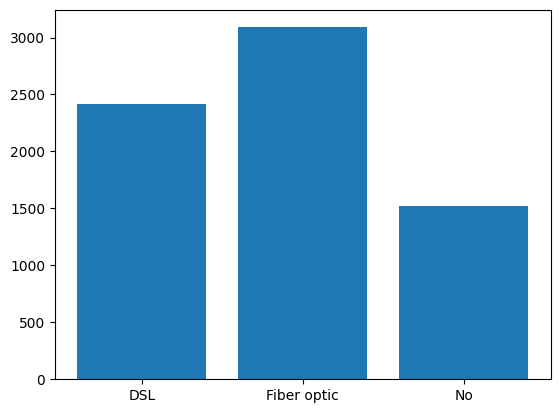

In [ ]:
plt.bar(x=df_dropped_rows['InternetService'].unique(), height=df_dropped_rows.groupby(by="InternetService")["customerID"].count())
plt.show()

Actually, we can represent this data better using the barh() function. To use the function, we must define the y and width parameters of the bar chart we want to create. Here is an example code to do it.

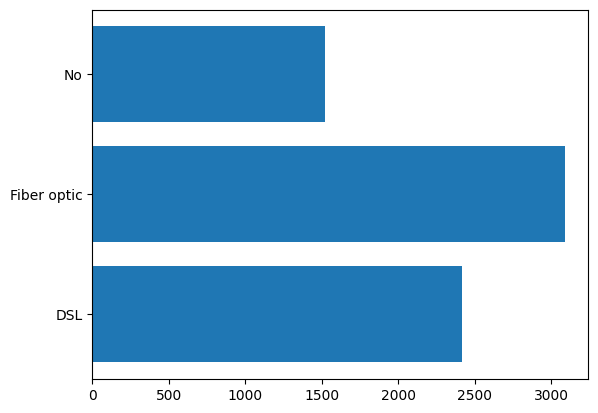

In [ ]:
plt.barh(y=df_dropped_rows['InternetService'].unique(), width=df_dropped_rows.groupby(by="InternetService")["customerID"].count())
plt.show()

To clarify the data visualization, we can add some captions such as title and axis captions. To do this, we can use the title(), xlabel(), and ylabel() functions. The code below is an example of code to add captions to the data visualization plot results.

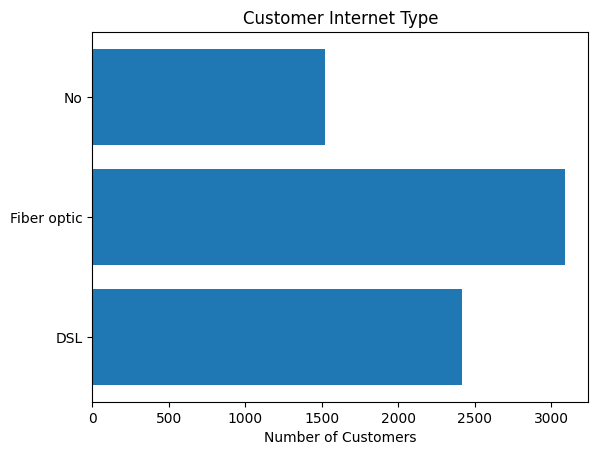

In [ ]:
plt.barh(y=df_dropped_rows['InternetService'].unique(), width=df_dropped_rows.groupby(by="InternetService")["customerID"].count())
plt.xlabel("Number of Customers")
plt.title("Customer Internet Type")
plt.show()

#### Pie Chart

Simple Example without DataFrames

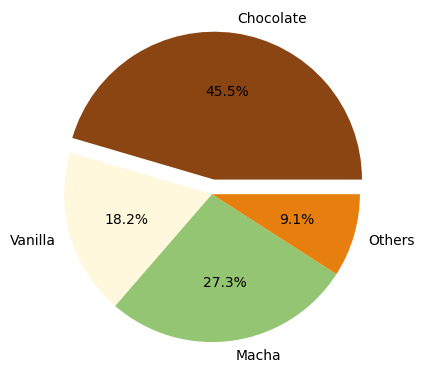

In [ ]:
flavors = ('Chocolate', 'Vanilla', 'Matcha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

Pie chart with DataFrames

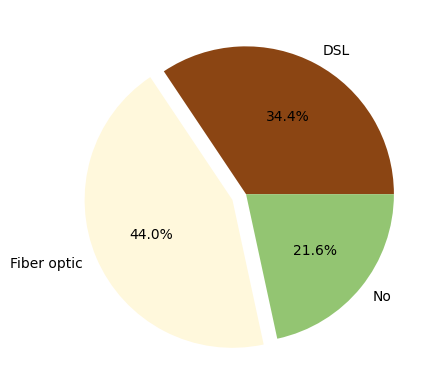

In [ ]:
explode = (0, 0.1, 0)

plt.pie(
    x=df_dropped_rows.groupby(by="InternetService")["customerID"].count(),
    labels=df_dropped_rows['InternetService'].unique(),
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

In addition, we can also use the wedgepros parameter to generate a donut plot. This parameter is used to set the size of the resulting hole. Here is the code example.

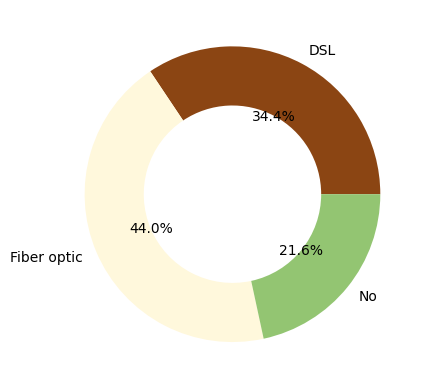

In [ ]:
plt.pie(
    x=df_dropped_rows.groupby(by="InternetService")["customerID"].count(),
    labels=df_dropped_rows['InternetService'].unique(),
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops = {'width': 0.4}
)
plt.show()

#### Histogram

If the previous two graphs were used for categorical data, we are now acquainted with a graph for quantitative data called a histogram. This graph is used to describe the distribution of quantitative data. At first glance, the shape of the histogram graph is similar to the shape of the bar chart, the only difference is the X-axis. In a histogram graph, the X-axis is used to accommodate the range of values of quantitative data known as bins.

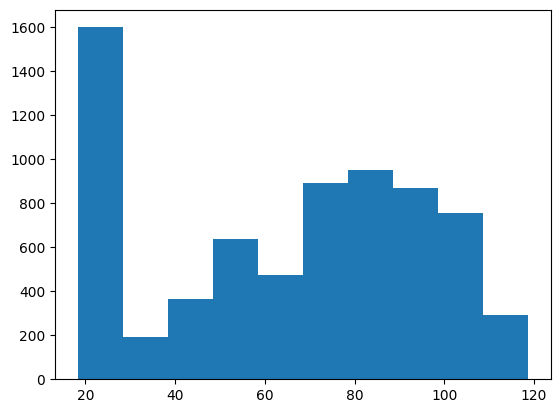

In [ ]:
plt.hist(x=df["MonthlyCharges"], bins=10)
plt.show()

Besides using the matplotlib library, we can also create histogram graphs with the seaborn library. This library provides the histplot() function to create a histogram graph. Here's an example code to do it.

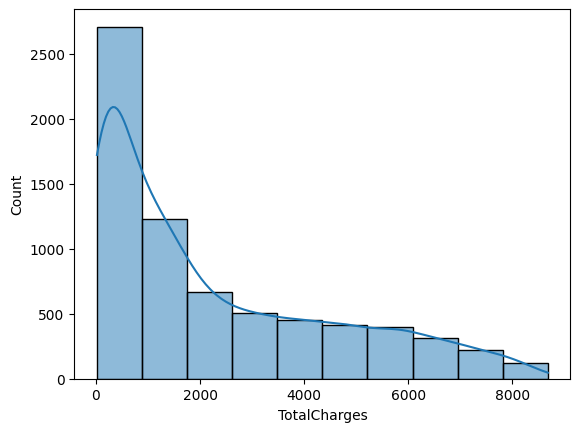

In [ ]:
import seaborn as sns

sns.histplot(x=df["TotalCharges"], bins=10, kde=True)
plt.show()

#### Box Plot

Another form of data visualization that can be used to identify distributions in quantitative data is the box plot. It is a visual form to represent the IQR value along with the lower and upper thresholds of the data. This box plot can also be used to identify outliers in quantitative data.

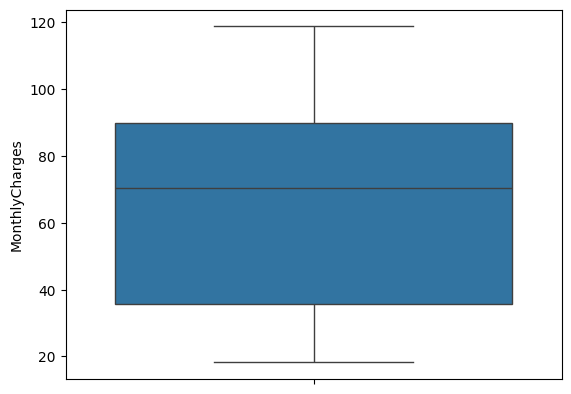

In [ ]:
sns.boxplot(df["MonthlyCharges"])
plt.show()

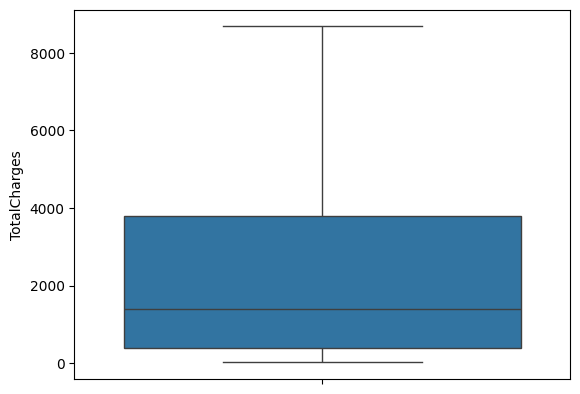

In [ ]:
sns.boxplot(df["TotalCharges"])
plt.show()